# ML Foreclosure Binary Classification - EPOCH 2 data

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 06 = Repurchased
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale
        * 16 = Reperforming Loan Sale

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [51]:
df=pd.read_csv("D:\FM_Acq_Perf_FMAC_EPOCH2_ML.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,1133339,1133339,100209956357,2,5.125,348000,2009-02-01,2009-04-01,87.0,1.0,...,5.04,5.13,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975
1,1133340,1133340,100392775700,3,4.625,195000,2009-02-01,2009-04-01,52.0,2.0,...,5.04,5.13,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441
2,1133341,1133341,100621428854,2,4.875,342000,2009-02-01,2009-04-01,80.0,1.0,...,5.04,5.13,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708
3,1133342,1133342,100720959726,1,5.375,93000,2009-02-01,2009-05-01,70.0,1.0,...,5.04,5.13,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758
4,1133343,1133343,100783704799,1,4.875,182000,2009-02-01,2009-04-01,76.0,2.0,...,5.04,5.13,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  119696 non-null  int64  
 1   Unnamed: 0.1                119696 non-null  int64  
 2   id                          119696 non-null  int64  
 3   origChannel                 119696 non-null  int64  
 4   origIntRate                 119696 non-null  float64
 5   origUPB                     119696 non-null  int64  
 6   origDate                    119696 non-null  object 
 7   firstPmtDate                119696 non-null  object 
 8   origLTV                     119696 non-null  float64
 9   numBorrowers                119696 non-null  float64
 10  origDebtIncRatio            119696 non-null  float64
 11  borrCreditScore             119696 non-null  float64
 12  loanPurp                    119696 non-null  int64  
 13  zipCode       

## Remove columns not involved in 'Foreclosure or Not' query

In [53]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt','servActivIndicator',\
         'deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         119696 non-null  int64  
 1   origIntRate         119696 non-null  float64
 2   origUPB             119696 non-null  int64  
 3   origDate            119696 non-null  object 
 4   origLTV             119696 non-null  float64
 5   numBorrowers        119696 non-null  float64
 6   origDebtIncRatio    119696 non-null  float64
 7   borrCreditScore     119696 non-null  float64
 8   loanPurp            119696 non-null  int64  
 9   zipCode             119696 non-null  int64  
 10  pMIperct            119696 non-null  float64
 11  mortInsType         119696 non-null  float64
 12  bestCreditScore     119696 non-null  float64
 13  worstCreditScore    119696 non-null  float64
 14  avgCreditScore      119696 non-null  float64
 15  bankNumber          119696 non-nul

## Engineer originDate into Date features

In [55]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [56]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [57]:
df.drop(['origDate'],1,inplace=True)

In [58]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2009,2
1,2009,2
2,2009,2
3,2009,2
4,2009,2


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [59]:
df.zeroBalCode.unique()

array([ 9.,  1.,  3., 16.,  6.,  2., 15.])

In [60]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [61]:
df.zeroBalCode.unique()

array([1., 0.])

In [62]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         119696 non-null  int64  
 1   origIntRate         119696 non-null  float64
 2   origUPB             119696 non-null  int64  
 3   origLTV             119696 non-null  float64
 4   numBorrowers        119696 non-null  float64
 5   origDebtIncRatio    119696 non-null  float64
 6   borrCreditScore     119696 non-null  float64
 7   loanPurp            119696 non-null  int64  
 8   zipCode             119696 non-null  int64  
 9   pMIperct            119696 non-null  float64
 10  mortInsType         119696 non-null  float64
 11  bestCreditScore     119696 non-null  float64
 12  worstCreditScore    119696 non-null  float64
 13  avgCreditScore      119696 non-null  float64
 14  bankNumber          119696 non-null  int64  
 15  stateNumber         119696 non-nul

# Review values for dates and slice (if needed) the timeframe you want

In [63]:
df.origYear.unique()

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

In [64]:
df['origMonth'].unique()

array([ 2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

# Coerce the column dtype (int in this case)

In [65]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         119696 non-null  int64  
 1   origIntRate         119696 non-null  float64
 2   origUPB             119696 non-null  int64  
 3   origLTV             119696 non-null  int32  
 4   numBorrowers        119696 non-null  int32  
 5   origDebtIncRatio    119696 non-null  int32  
 6   borrCreditScore     119696 non-null  int32  
 7   loanPurp            119696 non-null  int64  
 8   zipCode             119696 non-null  int64  
 9   pMIperct            119696 non-null  float64
 10  mortInsType         119696 non-null  int32  
 11  bestCreditScore     119696 non-null  int32  
 12  worstCreditScore    119696 non-null  int32  
 13  avgCreditScore      119696 non-null  int32  
 14  bankNumber          119696 non-null  int64  
 15  stateNumber         119696 non-nul

<a id='MLReady'></a>

<a id='MLReady'></a>
## *MLReady.csv file loading point
uncomment one of the boxes below

In [67]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

In [79]:
#df = pd.read_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Review metrics last time before run (to have record of starting values)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         119696 non-null  int64  
 1   origIntRate         119696 non-null  float64
 2   origUPB             119696 non-null  int64  
 3   origLTV             119696 non-null  int32  
 4   numBorrowers        119696 non-null  int32  
 5   origDebtIncRatio    119696 non-null  int32  
 6   borrCreditScore     119696 non-null  int32  
 7   loanPurp            119696 non-null  int64  
 8   zipCode             119696 non-null  int64  
 9   pMIperct            119696 non-null  float64
 10  mortInsType         119696 non-null  int32  
 11  bestCreditScore     119696 non-null  int32  
 12  worstCreditScore    119696 non-null  int32  
 13  avgCreditScore      119696 non-null  int32  
 14  bankNumber          119696 non-null  int64  
 15  stateNumber         119696 non-nul

In [69]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,2,5.125,348000,87,1,50,689,2,51,25.0,...,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975,2009,2
1,3,4.625,195000,52,2,54,703,1,82,0.0,...,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441,2009,2
2,2,4.875,342000,80,1,54,746,1,981,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2
3,1,5.375,93000,70,1,50,780,1,496,0.0,...,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758,2009,2
4,1,4.875,182000,76,2,22,802,1,18,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2


# Pycaret - Setup with categorical definition

### Use feature engineering, polynomial features, trig feats, PCA

In [70]:
# models=setup(df, target = 'rateDiffPct',
#              feature_interaction=True, feature_ratio=True,
#              polynomial_features=True, pca=True, pca_components=10,
#             numeric_features = ['origUPB','origLTV','numBorrowers','origDebtIncRatio',\
#                                'avgCreditScore'],
#             ignore_features = ['origIntRate','rank','deal'])

### Use default setup

In [71]:
models=setup(df, target = 'zeroBalCode')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3739
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(119696, 31)"
4,Missing Values,False
5,Numeric Features,26
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with no blacklist exclusions

In [73]:
model_results=compare_models() #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.866100,0.793800,0.073000,0.568600,0.129300,0.101400
1,CatBoost Classifier,0.866000,0.797100,0.093600,0.548500,0.159900,0.125200
2,Gradient Boosting Classifier,0.865500,0.789500,0.052200,0.571400,0.095600,0.074500
3,Extreme Gradient Boosting,0.865300,0.788200,0.036000,0.592400,0.067800,0.053000
4,Ridge Classifier,0.863700,0.000000,0.000100,0.050000,0.000200,0.000100
5,Linear Discriminant Analysis,0.863700,0.756000,0.021100,0.502700,0.040500,0.029800
6,Logistic Regression,0.863600,0.731200,0.007100,0.456400,0.014000,0.009800
7,Ada Boost Classifier,0.863300,0.775000,0.074200,0.488000,0.128600,0.096300
8,Extra Trees Classifier,0.862200,0.734700,0.030700,0.422400,0.057200,0.039300
9,Random Forest Classifier,0.859400,0.696400,0.064300,0.401500,0.110800,0.076000


## Create models 

#### Light GBM

In [74]:
lightgbm = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8668,0.8047,0.0640,0.6033,0.1157,0.0920
1,0.8653,0.7941,0.0683,0.5455,0.1214,0.0939
2,0.8679,0.7909,0.0832,0.6129,0.1465,0.1178
3,0.8666,0.7993,0.0762,0.5800,0.1347,0.1064
4,0.8645,0.7867,0.0683,0.5235,0.1208,0.0923
5,0.8669,0.7967,0.0753,0.5931,0.1336,0.1062
6,0.8661,0.7913,0.0674,0.5746,0.1207,0.0948
7,0.8667,0.7984,0.0798,0.5759,0.1401,0.1106
8,0.8643,0.7903,0.0701,0.5128,0.1234,0.0937
9,0.8662,0.7854,0.0771,0.5641,0.1357,0.1064


#### CatBoost

In [75]:
catboost =create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8666,0.8050,0.0903,0.5628,0.1556,0.1226
1,0.8656,0.7998,0.0919,0.5412,0.1572,0.1225
2,0.8673,0.7943,0.1033,0.5728,0.1751,0.1392
3,0.8660,0.8008,0.0981,0.5463,0.1663,0.1302
4,0.8647,0.7912,0.0884,0.5206,0.1512,0.1162
5,0.8670,0.7999,0.0902,0.5787,0.1561,0.1239
6,0.8656,0.7956,0.0884,0.5430,0.1521,0.1185
7,0.8646,0.8011,0.0876,0.5181,0.1499,0.1151
8,0.8652,0.7933,0.0920,0.5303,0.1568,0.1214
9,0.8674,0.7902,0.1060,0.5708,0.1789,0.1423


#### XGBoost

In [76]:
xgboost = create_model('xgboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8662,0.7991,0.0351,0.6667,0.0666,0.0537
1,0.8656,0.7885,0.0368,0.6176,0.0694,0.0549
2,0.8648,0.7867,0.0377,0.5584,0.0705,0.0543
3,0.8642,0.7905,0.0385,0.5238,0.0718,0.0541
4,0.8645,0.7797,0.0342,0.5493,0.0643,0.0491
5,0.8654,0.7939,0.0377,0.5972,0.0708,0.0556
6,0.8639,0.7889,0.0306,0.5147,0.0579,0.0432
7,0.8670,0.7907,0.0429,0.6901,0.0809,0.0660
8,0.8646,0.7837,0.0272,0.5636,0.0518,0.0398
9,0.8662,0.7806,0.0394,0.6429,0.0743,0.0595


## Tune Models

#### CatBoost

In [77]:
tuned_catboost = tune_model('catboost') # from fold=50

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8668,0.8029,0.0403,0.6866,0.0762,0.0620
1,0.8650,0.7916,0.0403,0.5679,0.0752,0.0582
2,0.8656,0.7897,0.0420,0.6000,0.0786,0.0618
3,0.8647,0.7943,0.0403,0.5476,0.0750,0.0574
4,0.8647,0.7842,0.0368,0.5526,0.0690,0.0529
5,0.8649,0.7947,0.0315,0.5806,0.0598,0.0464
6,0.8644,0.7910,0.0368,0.5385,0.0689,0.0523
7,0.8650,0.7953,0.0368,0.5676,0.0691,0.0534
8,0.8648,0.7878,0.0351,0.5556,0.0660,0.0506
9,0.8670,0.7841,0.0456,0.6753,0.0854,0.0694


### CatBoost had mixed improvements / declines 
#### Improved:  Accuracy    Precision
#### Declined: AUC   Recall    F1   Kappa
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.8661	0.7938	0.0730	0.5686	0.1293	0.1014
    Tuned:    Mean	0.8653	0.7916	0.0385	0.5872	0.0723	0.0564

#### Light GBM

In [78]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8668,0.8032,0.0692,0.5940,0.1240,0.0984
1,0.8642,0.7912,0.0622,0.5145,0.1109,0.0840
2,0.8685,0.7892,0.0832,0.6333,0.1471,0.1192
3,0.8663,0.7961,0.0718,0.5775,0.1277,0.1006
4,0.8653,0.7854,0.0604,0.5520,0.1089,0.0843
5,0.8662,0.7952,0.0683,0.5778,0.1222,0.0961
6,0.8654,0.7915,0.0587,0.5583,0.1062,0.0824
7,0.8658,0.7941,0.0684,0.5612,0.1219,0.0951
8,0.8655,0.7867,0.0657,0.5515,0.1175,0.0911
9,0.8693,0.7857,0.0833,0.6597,0.1479,0.1210


### LightGBM had mixed improvements / declines 
#### Improved:  Accuracy    Precision
#### Declined: AUC   Recall    F1   Kappa
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.8661	0.7938	0.0730	0.5686	0.1293	0.1014
    Tuned:    Mean	0.8663	0.7918	0.0691	0.5780	0.1234	0.0972

#### XGBoost

In [ ]:
tuned_xgboost = tune_model('xgboost')

Didn't tune xgboost since it takes about 5 hours and I don't see a big benefit tuning the above models

## Ensemble models

#### CatBoost Bagging

In [80]:
catboost_bagged = ensemble_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8666,0.8063,0.0798,0.5723,0.1400,0.1104
1,0.8651,0.8001,0.0806,0.5349,0.1400,0.1082
2,0.8684,0.7948,0.0954,0.6089,0.1650,0.1330
3,0.8660,0.8009,0.0849,0.5543,0.1473,0.1153
4,0.8649,0.7914,0.0744,0.5312,0.1306,0.1004
5,0.8651,0.7983,0.0727,0.5390,0.1281,0.0989
6,0.8665,0.7958,0.0797,0.5723,0.1399,0.1103
7,0.8656,0.8018,0.0789,0.5455,0.1378,0.1071
8,0.8670,0.7922,0.0911,0.5746,0.1573,0.1247
9,0.8685,0.7905,0.0990,0.6043,0.1702,0.1371


### CatBoost had great improvements with Ensemble Bagging
#### Improved:  Accuracy   AUC   Recall   F1   Kappa
#### Declined:   Precision    
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.8661	0.7938	0.0730	0.5686	0.1293	0.1014
    Bagging:  Mean	0.8664	0.7972	0.0837	0.5637	0.1456	0.1145

In [ ]:
catboost_boosted = ensemble_model(catboost)

## Stack 3 chosen Models (Can't blend catboost)

In [98]:
stacker = stack_models(estimator_list = [catboost, lightgbm], meta_model = xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8657,0.8061,0.0771,0.5500,0.1353,0.1053
1,0.8649,0.7984,0.0788,0.5294,0.1372,0.1056
2,0.8669,0.7938,0.0858,0.5799,0.1495,0.1185
3,0.8659,0.8014,0.0797,0.5549,0.1394,0.1089
4,0.8647,0.7903,0.0744,0.5247,0.1304,0.0999
5,0.8678,0.7990,0.0771,0.6197,0.1371,0.1102
6,0.8656,0.7943,0.0762,0.5506,0.1338,0.1042
7,0.8648,0.8020,0.0815,0.5225,0.1410,0.1082
8,0.8655,0.7931,0.0868,0.5380,0.1494,0.1160
9,0.8680,0.7888,0.0859,0.6087,0.1505,0.1209


#### First blend 'non-tuned' models

In [118]:
calibrated_lightgbm = calibrate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8682,0.8078,0.1350,0.5683,0.2181,0.1750
1,0.8645,0.7976,0.1138,0.5138,0.1864,0.1441
2,0.8678,0.7929,0.1349,0.5620,0.2175,0.1739
3,0.8638,0.8002,0.1138,0.5019,0.1856,0.1424
4,0.8631,0.7897,0.1112,0.4903,0.1813,0.1379
5,0.8665,0.8003,0.1270,0.5431,0.2058,0.1626
6,0.8660,0.7952,0.1235,0.5361,0.2007,0.1577
7,0.8681,0.8006,0.1315,0.5682,0.2135,0.1711
8,0.8666,0.7918,0.1341,0.5406,0.2149,0.1700
9,0.8680,0.7886,0.1464,0.5585,0.2319,0.1859


## Evaluate Models

# Light Gradient Boosting Machine  Analysis

## Plot Model for Light Gradient Boosting Machine  (lightgbm)

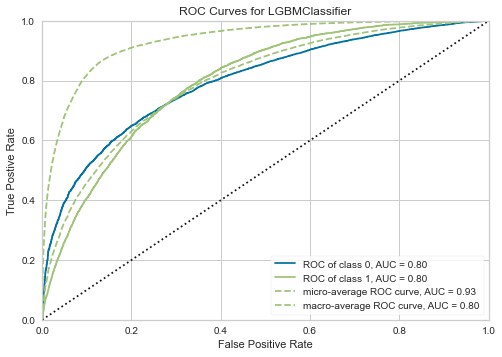

In [159]:
plot_model(lightgbm) # AUC

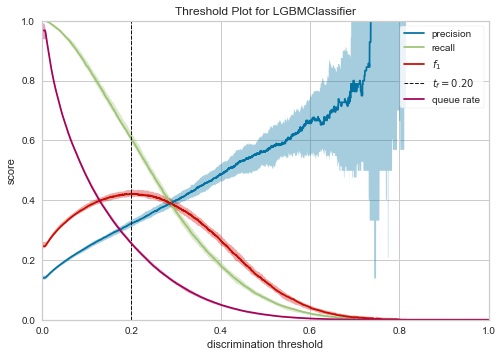

In [160]:
plot_model(lightgbm, plot='threshold')

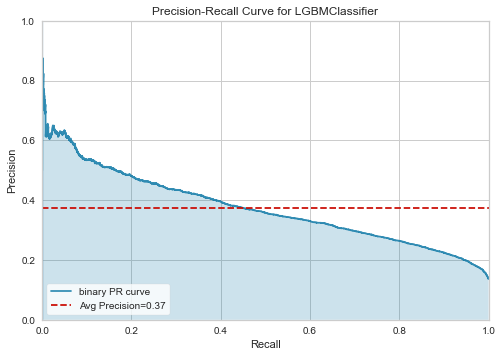

In [165]:
plot_model(lightgbm, plot='pr')

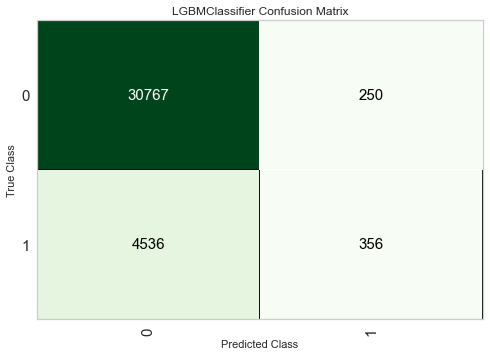

In [166]:
plot_model(lightgbm, plot='confusion_matrix')

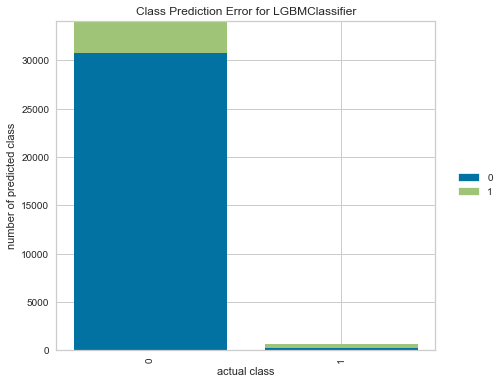

In [167]:
plot_model(lightgbm, plot='error')

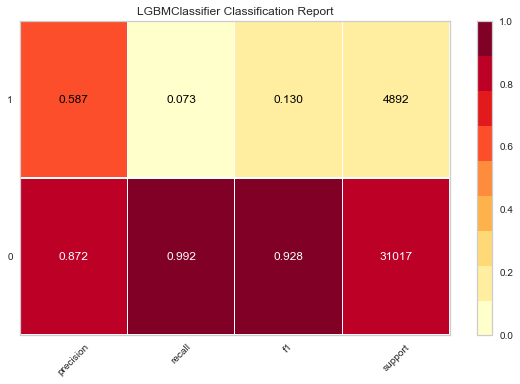

In [168]:
plot_model(lightgbm, plot='class_report')

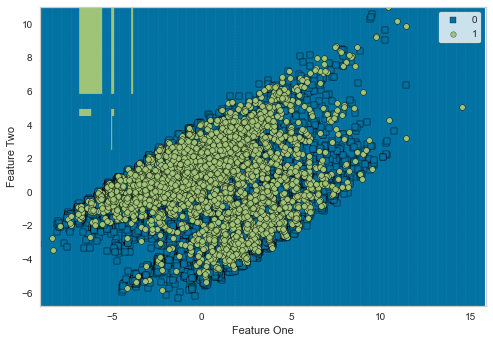

In [169]:
plot_model(lightgbm, plot='boundary')

IntProgress(value=0, description='Processing: ', max=5)

KeyboardInterrupt: 

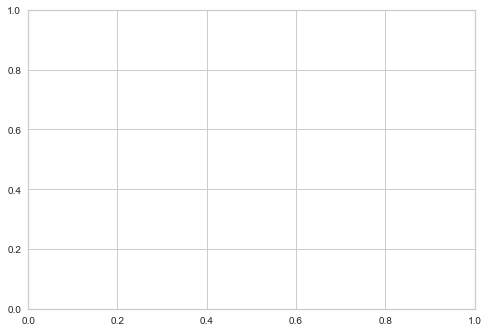

In [163]:
plot_model(lightgbm, plot='rfe')

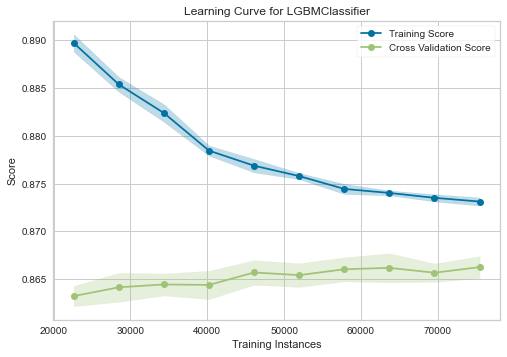

In [158]:
plot_model(lightgbm, plot='learning')

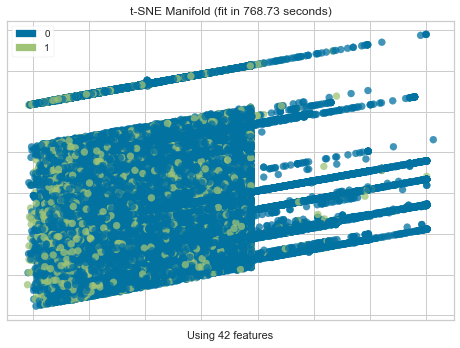

In [157]:
plot_model(lightgbm, plot='manifold')

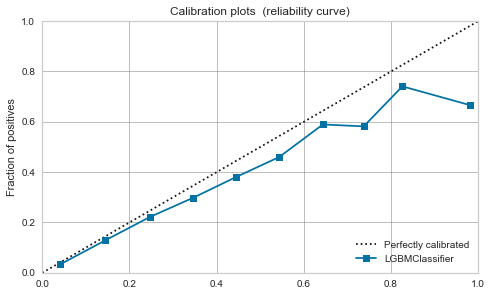

In [156]:
plot_model(lightgbm, plot='calibration')

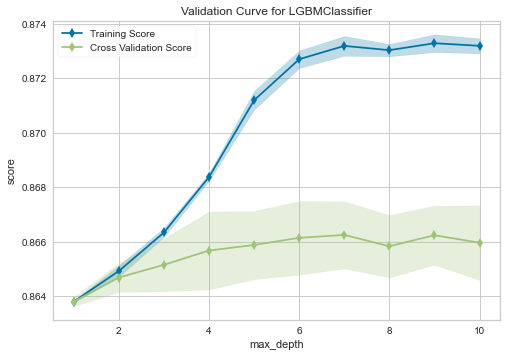

In [94]:
plot_model(lightgbm, plot='vc')

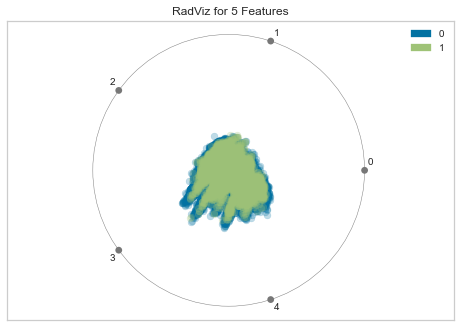

In [154]:
plot_model(lightgbm, plot='dimension')

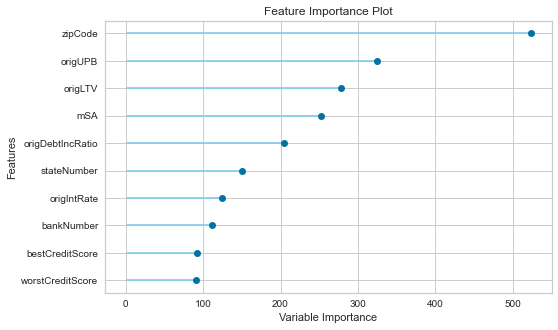

In [95]:
plot_model(lightgbm, plot = 'feature')

In [170]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100


# Interpret Models

## LightGMB Correlation Plots

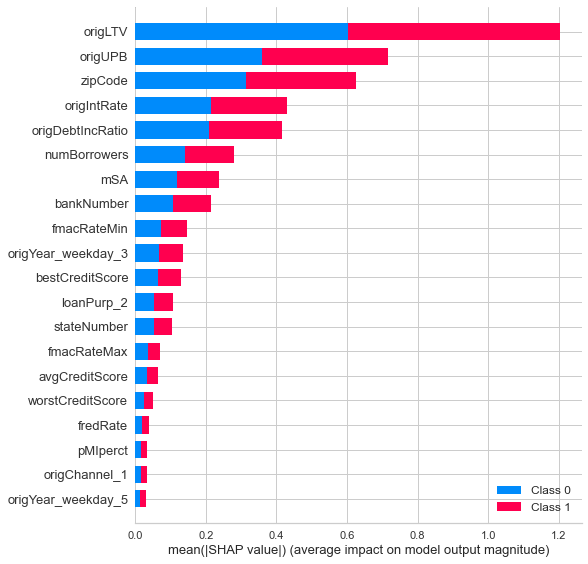

In [146]:
interpret_model(lightgbm, plot = 'summary')

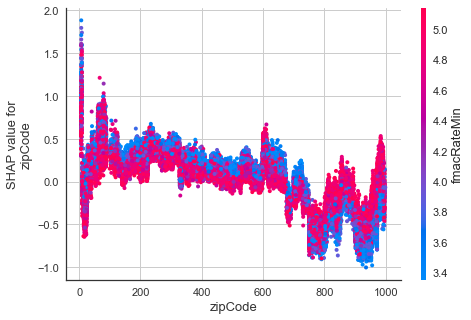

In [99]:
interpret_model(lightgbm, plot='correlation', feature='zipCode')

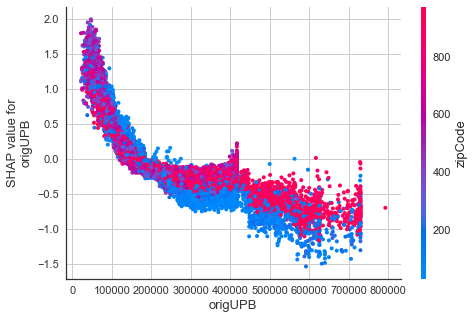

In [150]:
interpret_model(lightgbm, plot='correlation', feature='origUPB')

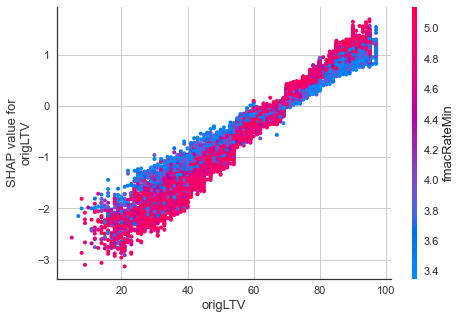

In [151]:
interpret_model(lightgbm, plot='correlation', feature='origLTV')

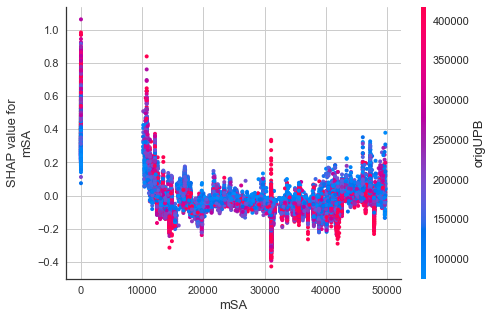

In [152]:
interpret_model(lightgbm, plot='correlation', feature='mSA')

# Catboost Analysis

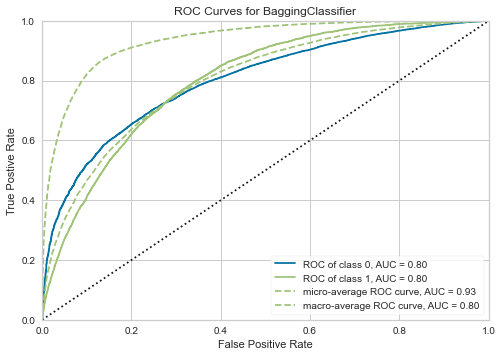

In [171]:
plot_model(catboost_bagged)

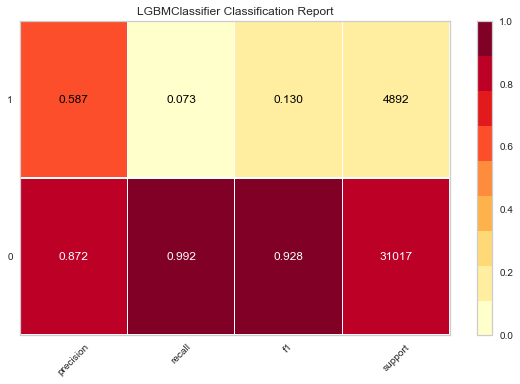

In [168]:
plot_model(catboost, plot='class_report')

# Interpret Catboost Model

## Catboost Summary

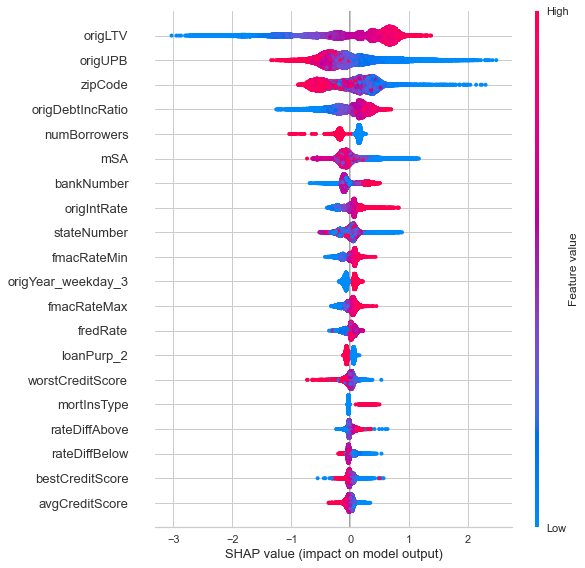

In [121]:
interpret_model(catboost, plot = 'summary')

## Catboost Correlation Plots

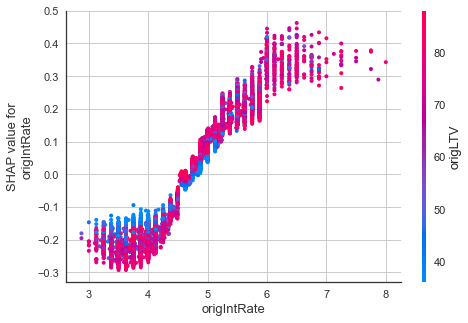

In [116]:
interpret_model(tuned_catboost, plot = 'correlation')

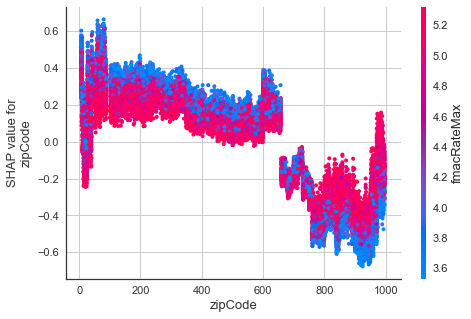

In [149]:
interpret_model(tuned_catboost, plot='correlation', feature='zipCode')

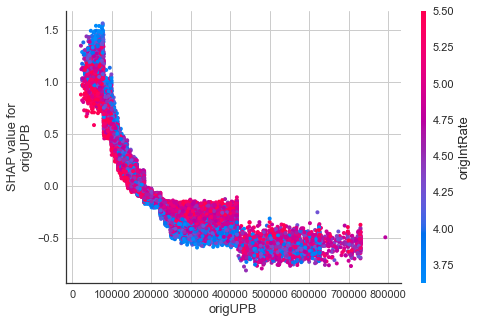

In [147]:
interpret_model(tuned_catboost, plot='correlation', feature='origUPB')

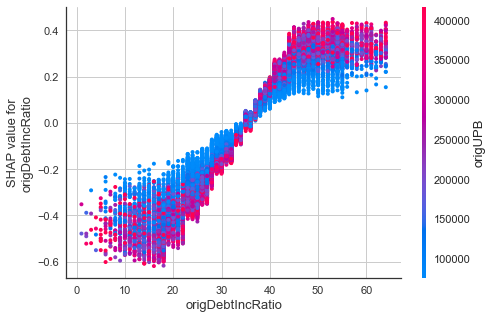

In [148]:
interpret_model(tuned_catboost, plot='correlation', feature='origDebtIncRatio')

## Predict models

In [135]:
pred_holdout = predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8656,0.7953,0.0382,0.6071,0.0719,0.0567


In [136]:
pred_holdout2 = predict_model(catboost_bagged)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8669,0.8018,0.085,0.5786,0.1483,0.1175


In [137]:
pred_holdout = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8667,0.7977,0.0728,0.5875,0.1295,0.1025


In [138]:
pred_holdout = predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8655,0.7901,0.036,0.6111,0.068,0.0536


## Finalize models

In [139]:
final_catboost_bagged = finalize_model(catboost_bagged)

In [140]:
final_lightgbm = finalize_model(lightgbm)

In [142]:
final_xgboost = finalize_model(xgboost)

## Save model

In [143]:
save_model(catboost_bagged, 'Forclo_2_catboost_bag_052320')

Transformation Pipeline and Model Succesfully Saved


In [144]:
save_model(lightgbm, 'Forclo_2_lightgbm_052320')

Transformation Pipeline and Model Succesfully Saved


In [161]:
save_model(xgboost, 'Forclo_2_xgboost_052320')

Transformation Pipeline and Model Succesfully Saved
